# 各类燃弧分布分析

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
res_path = '../res/'
n_clusters = 5
n_machines = 10
res_df = pd.read_csv(res_path + '2_cluster_' + str(n_clusters) + '.csv')

In [3]:
machine_group = res_df.groupby('machine_id')

### 方式二、计算各类燃弧在滑动窗口中出现的频率分布情况

In [4]:
# 计算各类燃弧在滑动窗口中出现的频率
win_size = 50
win_stride = 20#int(win_size / 2)

['0_frequency', '1_frequency', '2_frequency', '3_frequency', '4_frequency']
1 56
2 87
3 25
4 9
5 148
6 107
7 226
8 81
9 69
10 82


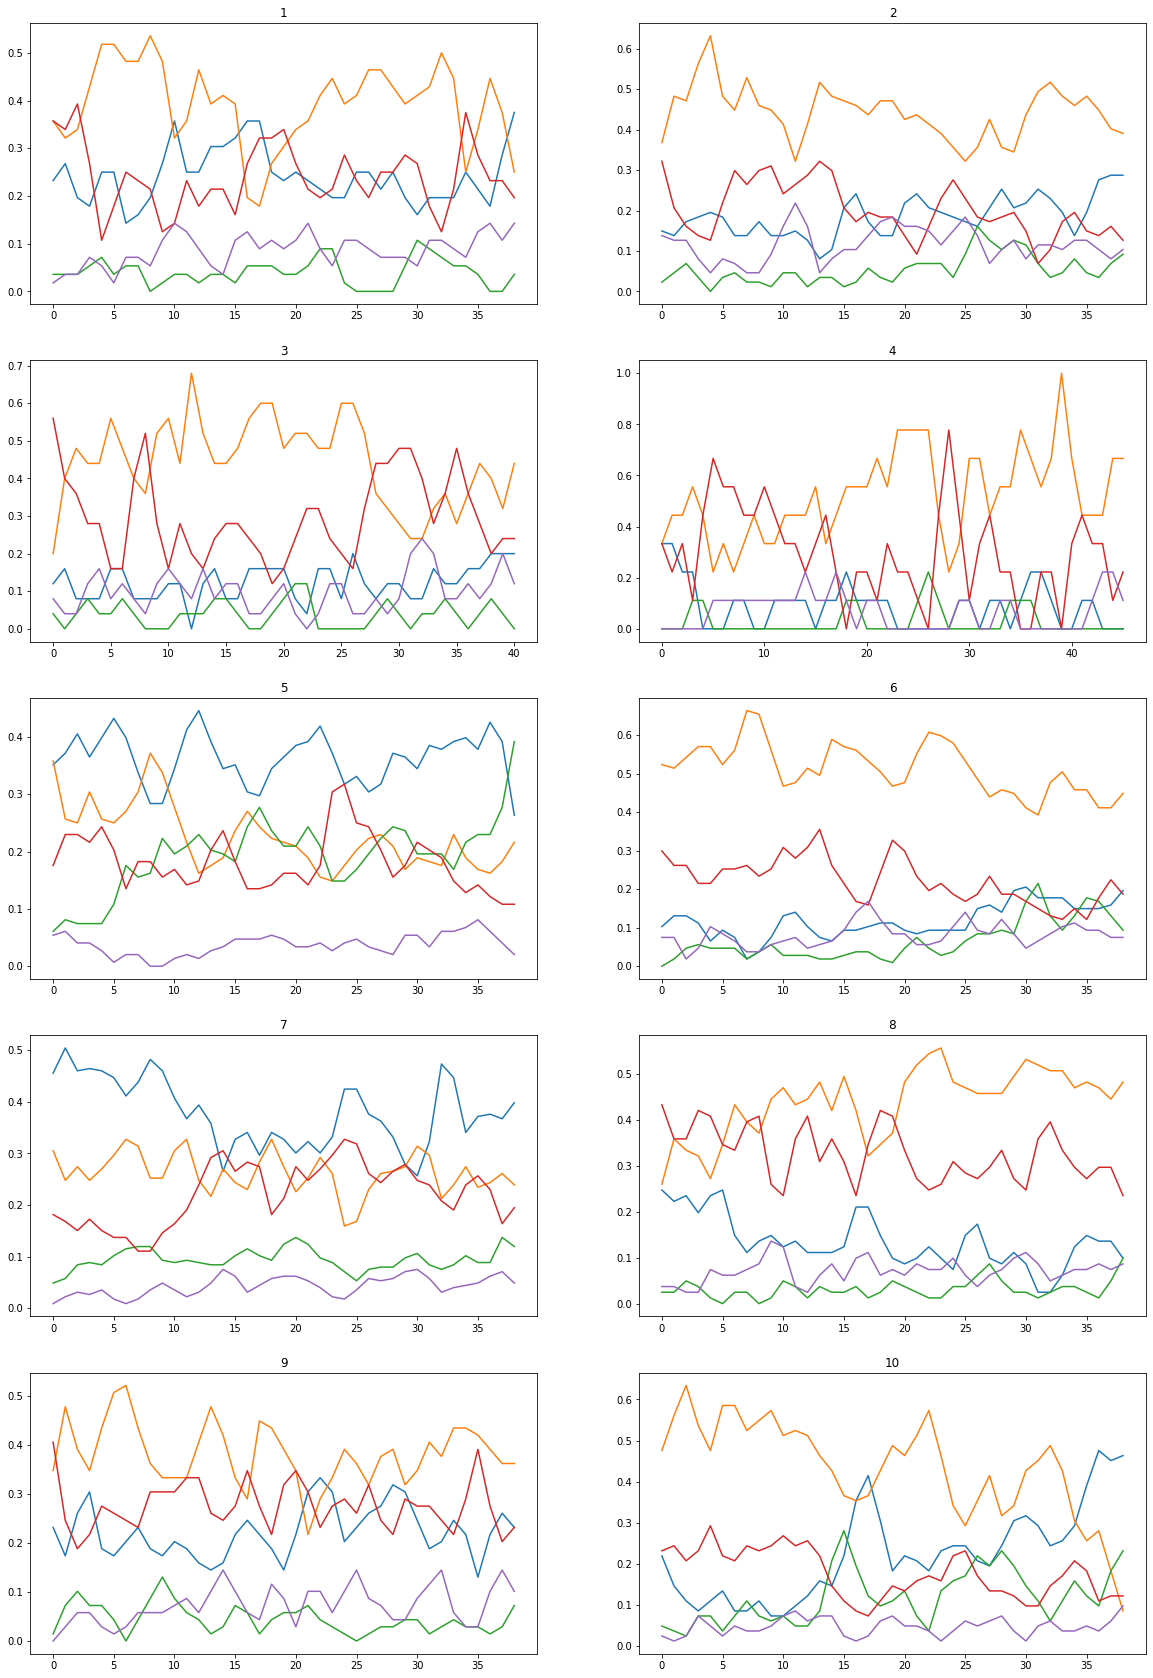

In [14]:
# 计算各类燃弧累计出现的频率（改）
labels_columns = [str(i) + '_frequency' for i in range(n_clusters)]
print(labels_columns)

plt.figure(figsize=(20, 30))
for machine_id in range(1, n_machines + 1):
    label_occ_count_df = pd.DataFrame(columns = labels_columns)
    tmp_machine_df = machine_group.get_group(machine_id).reset_index(drop = True)
    len_operations = len(tmp_machine_df)
    win_size = int(len_operations / 20)
    print(machine_id, win_size)
    
    idx_range = np.arange(win_size, len_operations, int(win_size / 2))
    for idx in tmp_machine_df.index[idx_range]:
        tmp_label_counts = []
        tmp_df = tmp_machine_df[idx - win_size : idx]
        for label in range(n_clusters):
            tmp_count = len(tmp_df[tmp_df['label'] == label])
            tmp_label_counts += [tmp_count/ win_size]
        label_occ_count_df = label_occ_count_df.append(pd.DataFrame([tmp_label_counts], columns = labels_columns), ignore_index = True)
        label_occ_count_df['machine_id'] = machine_id
    #break
    
    plt.subplot(5,2, machine_id)
    for col in labels_columns:
        plt.plot(label_occ_count_df[col])
        plt.title(machine_id)
    
#label_occ_count_df

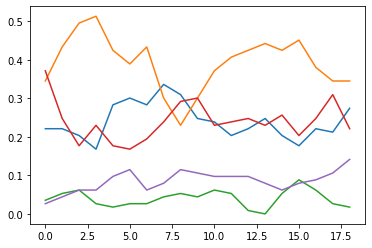

In [8]:
for col in labels_columns:
    plt.plot(label_occ_count_df[col])

In [5]:
# 计算各类燃弧累计出现的频率
labels_columns = ['machine_id'] + [str(i) + '_frequency' for i in range(n_clusters)]
print(labels_columns)
label_occ_count_df = pd.DataFrame(columns = labels_columns)

for machine_id in range(1, n_machines + 1):
    tmp_machine_df = machine_group.get_group(machine_id).reset_index(drop = True)
    len_operations = len(tmp_machine_df)
    win_size = int(len_operations / 10)
    print(machine_id, win_size)
    
    idx_range = np.arange(win_size, len_operations, int(win_size / 2))
    for idx in tmp_machine_df.index[idx_range]:
        tmp_label_counts = [machine_id]
        tmp_df = tmp_machine_df[idx - win_size : idx]
        for label in range(n_clusters):
            tmp_count = len(tmp_df[tmp_df['label'] == label])
            tmp_label_counts += [tmp_count/ win_size]
        label_occ_count_df = label_occ_count_df.append(pd.DataFrame([tmp_label_counts], columns = labels_columns), ignore_index = True)

['machine_id', '0_frequency', '1_frequency', '2_frequency', '3_frequency', '4_frequency']


In [20]:
label_occ_count_df.head()

,machine_id,0_frequency,1_frequency,2_frequency,3_frequency,4_frequency
0,1,0.24,0.36,0.04,0.34,0.02
1,1,0.22,0.36,0.04,0.36,0.02
2,1,0.22,0.36,0.04,0.36,0.02
3,1,0.24,0.34,0.04,0.36,0.02
4,1,0.22,0.36,0.04,0.36,0.02


In [6]:
label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
#label_frequency_columns = [str(label) + '_frequency' for label in [0,1,3]]
#frequency_df = pd.DataFrame(columns = label_frequency_columns + ['machine_id'])
sample_list = []
n_samples = 80
for i in range(1, 11):
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    machine_df_len = len(machine_df)
    print(i, machine_df_len)
    machine_range = np.arange(machine_df_len - int(machine_df_len/n_samples) * n_samples, machine_df_len, int(machine_df_len/n_samples))
    tmp_list = list(np.array(machine_df.loc[machine_range][label_frequency_columns]).T.flatten())
    sample_list += [tmp_list]
    #break
    #frequency_df = frequency_df.append(tmp_df)
#sample_list

1 1081
2 1703
3 459
4 140
5 2921
6 2109
7 4471
8 1572
9 1343
10 1601


In [27]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 1)
kmeans.fit(sample_list)
print(list(np.arange(1, 11)))
print(list(kmeans.labels_))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 1, 3, 3, 2, 3, 2, 3, 1, 0]


109
101
115
140
101
101
102
105
104
101


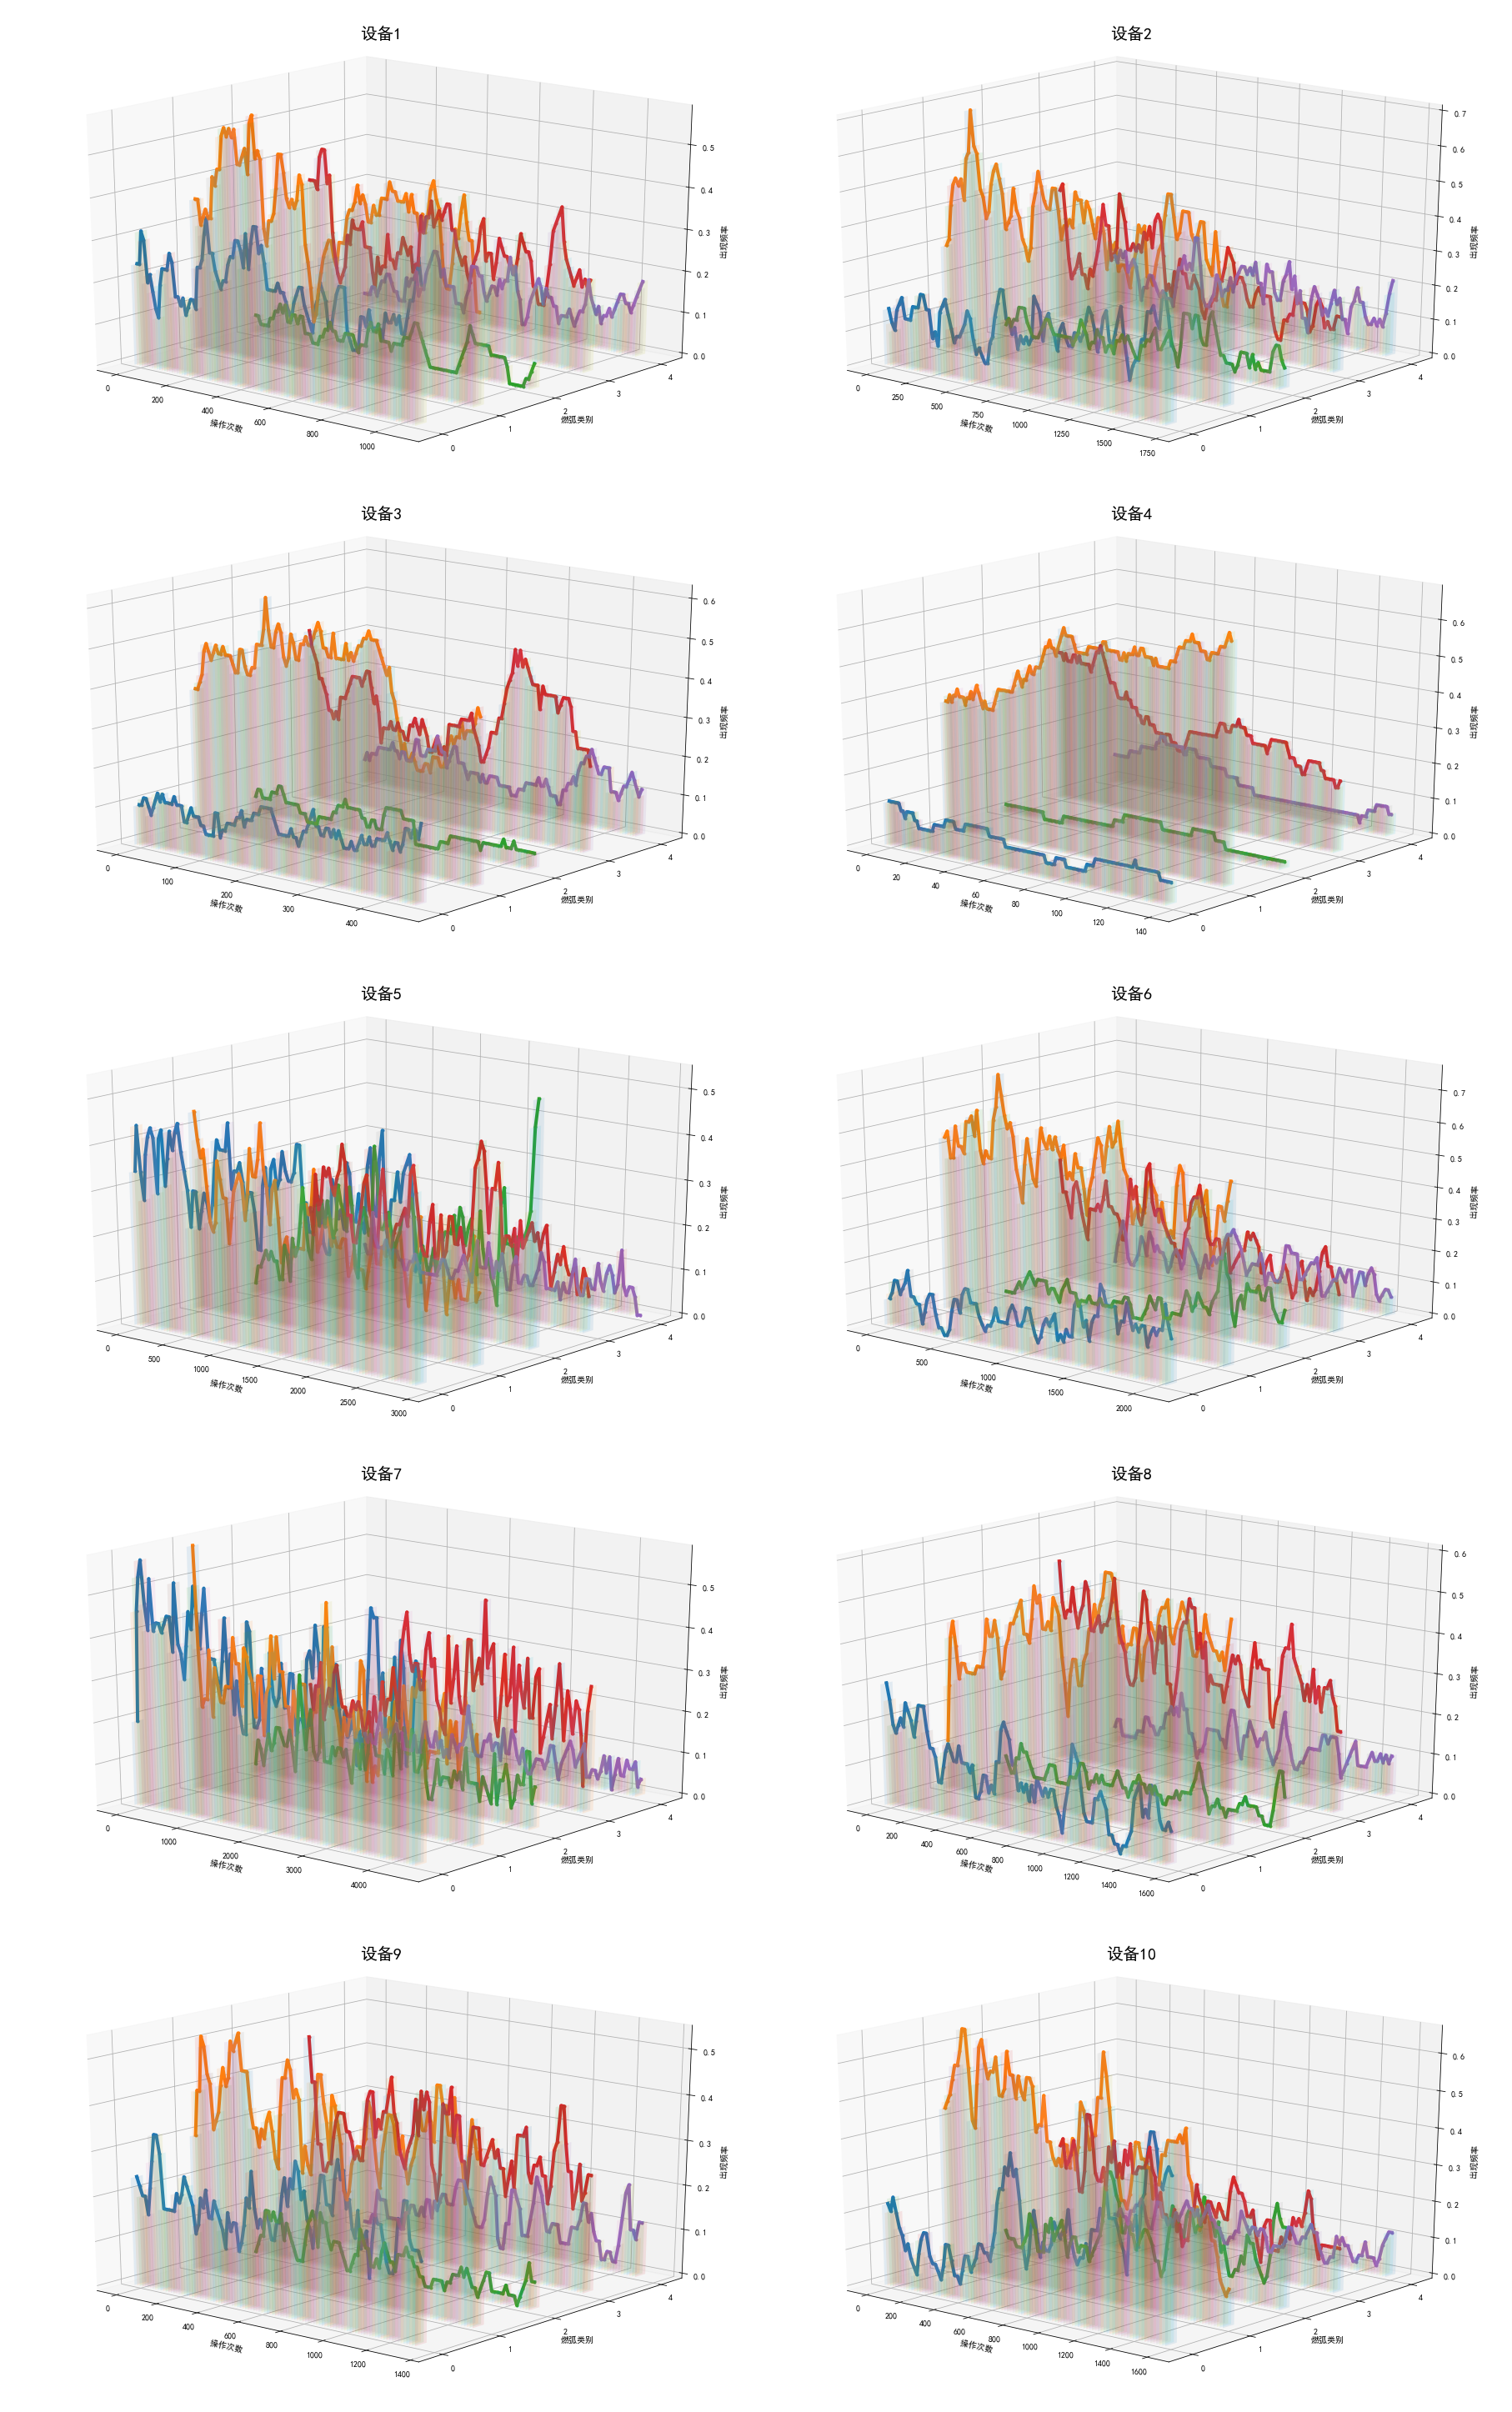

In [22]:
'''
各类燃弧在滑动窗口内出现的频率分布
'''
fig = plt.figure(figsize= (25, 40))
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0)
n_samples = 100
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    #machine_df_len = len(machine_df)
    #machine_range = np.arange(machine_df_len - int(machine_df_len/n_samples) * n_samples, machine_df_len, int(machine_df_len/n_samples))
    machine_range = np.arange(0, len(machine_df), int(len(machine_df)/100))
    print(len(machine_range))
    #绘制柱状图
    for z in machine_range:
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.1, linewidth = 0, width = 0.2)

    ax.view_init(20, -50)#(10, -15)

    #绘制折线图
    for z in range(n_clusters):
        xs = machine_range
        ys = machine_df.loc[xs][str(z) + '_frequency'].tolist()
        ax.plot(xs, ys, zs = z, zdir='y',marker = '.',linewidth = 4)
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_yticks(np.arange(n_clusters)) #设置刻度
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i), fontsize=20)
plt.savefig('../fig/类别数'+str(n_clusters)+'分布图_window.png',dpi = 100)
plt.show()

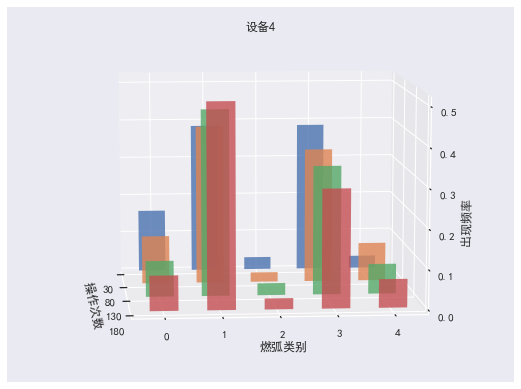

In [66]:
fig = plt.figure(figsize= (20, 40))
for i in [4]:#range(1, 11):
    ax = fig.add_subplot(5,2, i, projection='3d')

    label_frequency_columns = [str(label) + '_frequency' for label in range(n_clusters)]
    machine_df = label_occ_count_df.groupby('machine_id').get_group(i).reset_index(drop = True)
    for z in range(30, len(machine_df), 50):
        xs = np.arange(n_clusters)
        ys = machine_df.loc[z][label_frequency_columns].tolist()
        ax.bar(xs, ys, zs = z, zdir='x', alpha = 0.8, linewidth = 0, width = 0.5)

    ax.view_init(10, -5)

    
    ax.set_xlabel(u'操作次数    ')
    ax.set_ylabel(u'燃弧类别')
    ax.set_zlabel(u'出现频率    ')
    ax.set_title('设备' + str(i))
    ax.set_xticks(np.arange(30, 200, 50)) 
#plt.savefig('../fig/类别数'+str(n_clusters)+'分布图.png',dpi = 100)
plt.show()

In [59]:
len(X_tsne[(X_tsne['machine_id'] == 1) & (X_tsne['label'] == 1)])

440

In [76]:

        tmp = [machine_id, label, len(X_tsne[(X_tsne['machine_id'] == machine_id) & (X_tsne['label'] == label)])]
        tmp_df = pd.DataFrame([tmp], columns =['machine_id','label','count'])
        stat_res_df = stat_res_df.append(tmp_df, ignore_index = True)
        print(machine_id, label, len(X_tsne[(X_tsne['machine_id'] == machine_id) & (X_tsne['label'] == label)]))

,machine_id,label,count
0,1,0,101
1,1,1,440
2,1,2,274
3,1,3,274
4,1,4,47
5,2,0,208
6,2,1,766
7,2,2,352
8,2,3,331
9,2,4,96


In [53]:
X_clustered.head()

,A_arcing_duration,A_arcing_energy,A_arcing_electricity,A_arcing_power,B_arcing_duration,B_arcing_energy,B_arcing_electricity,B_arcing_power,C_arcing_duration,C_arcing_energy,C_arcing_electricity,C_arcing_power,label
0,0.625613,0.439489,0.321820,0.528864,0.659079,0.756005,1.387272,0.787895,-1.064511,-1.264814,-1.256825,-1.233994,0
1,0.220002,0.027694,0.668268,0.308239,-1.672671,-1.524703,-1.737356,-1.880570,0.146356,-0.124915,0.185927,0.032838,3
2,-0.628093,-0.805137,-0.664126,-0.574403,0.879055,0.580103,-0.002780,0.349130,0.814420,0.984374,1.569350,0.878038,1
3,0.478118,0.222672,0.428571,0.355542,0.395107,0.372876,0.916370,0.539142,-1.482051,-1.471305,-1.587111,-1.727110,0
4,-0.775588,-0.908806,-0.874971,-0.739541,0.703074,0.319623,0.081195,0.167777,0.605650,0.872720,1.331213,0.972378,1


In [50]:
X.shape

(17900, 12)

In [51]:
X['label'] = X_clustered[:-5]['label']

D:\Env\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
X.shape, tot_arcing_df.shape

((17900, 13), (17900, 19))

In [73]:
X['machine_id'] = tot_arcing_df['machine_id']

D:\Env\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
X.head()

,A_arcing_duration,A_arcing_energy,A_arcing_electricity,A_arcing_power,B_arcing_duration,B_arcing_energy,B_arcing_electricity,B_arcing_power,C_arcing_duration,C_arcing_energy,C_arcing_electricity,C_arcing_power,label,machine_id
0,64,677339.277890,2.014985e+06,10420.604275,65,811300.544782,3.491806e+06,12292.432497,24,100350.176043,4.943662e+05,4014.007042,0,1
1,53,510981.531539,2.418419e+06,9462.620954,12,23718.359796,7.483898e+04,1824.489215,53,477679.549880,2.113334e+06,8845.917590,3,1
2,30,174532.266319,8.668625e+05,5630.073107,70,750557.290086,1.971701e+06,10571.229438,69,844876.016428,3.665727e+06,12069.657378,1,1
3,60,589748.905774,2.139295e+06,9668.014849,59,678996.806536,2.976846e+06,11316.613442,14,31997.703587,1.237393e+05,2133.180239,0,1
4,26,132651.607727,6.213363e+05,4913.022508,66,660607.538014,2.063533e+06,9859.814000,64,807916.392832,3.398504e+06,12429.482967,1,1


In [76]:
X.to_csv('res_cluster.csv', index = False, header = True)

In [77]:
tmp_group = X.groupby('machine_id')

In [83]:
X_group_cols =  ['operation_times'] + X.columns.tolist()

In [84]:
X_group = pd.DataFrame([], columns = X_group_cols)

In [85]:
X_group

,operation_times,A_arcing_duration,A_arcing_energy,A_arcing_electricity,A_arcing_power,B_arcing_duration,B_arcing_energy,B_arcing_electricity,B_arcing_power,C_arcing_duration,C_arcing_energy,C_arcing_electricity,C_arcing_power,label,machine_id


In [86]:
for i in range(1, 11):
    tmp_dd = tmp_group.get_group(i).reset_index(drop = True)
    tmp_dd['operation_times'] = tmp_dd.index
    X_group = X_group.append(tmp_dd, ignore_index = True)

D:\Env\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [92]:
ll = ['machine_id', 'operation_times', 'label','A_arcing_duration', 'A_arcing_energy', 'A_arcing_electricity', 'A_arcing_power', 'B_arcing_duration', 'B_arcing_energy', 'B_arcing_electricity', 'B_arcing_power', 'C_arcing_duration', 'C_arcing_energy', 'C_arcing_electricity', 'C_arcing_power']
X_group = X_group[ll]

In [89]:
print(X.columns.tolist())

['A_arcing_duration', 'A_arcing_energy', 'A_arcing_electricity', 'A_arcing_power', 'B_arcing_duration', 'B_arcing_energy', 'B_arcing_electricity', 'B_arcing_power', 'C_arcing_duration', 'C_arcing_energy', 'C_arcing_electricity', 'C_arcing_power', 'label', 'machine_id']


In [93]:
X_group.to_csv('res_cluster.csv', index = False, header = True)